# Dixon-Coles model including temporal decay but with the old likelihood function 
Using p(exact outcome | params) instead of the proposed likelihood function p(win, lose, draw | params) which will come next

In [ ]:
from modeling import *
from data import *
from countries import *

In [ ]:
file = 'stan/dixon_coles_td_exact.stan'

In [ ]:
model = compile_or_load(file)

In [4]:
data = cut_data(get_data(), '2016-01-01')

In [7]:
data = add_time(data)

In [9]:
stan_data = prepare_stan_data(data)

In [11]:
fit = model.sampling(stan_data)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
model_old = compile_or_load('stan/dixon_coles_no_td.stan')

In [23]:
sd_old = stan_data.copy()
del sd_old['time']

In [24]:
fit_old =model_old.sampling(sd_old)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [34]:
from predictions import *
from plotting import *

In [28]:
matches = pd.read_csv('matches/quarterfinals.csv')

In [30]:
chains = fit.extract()

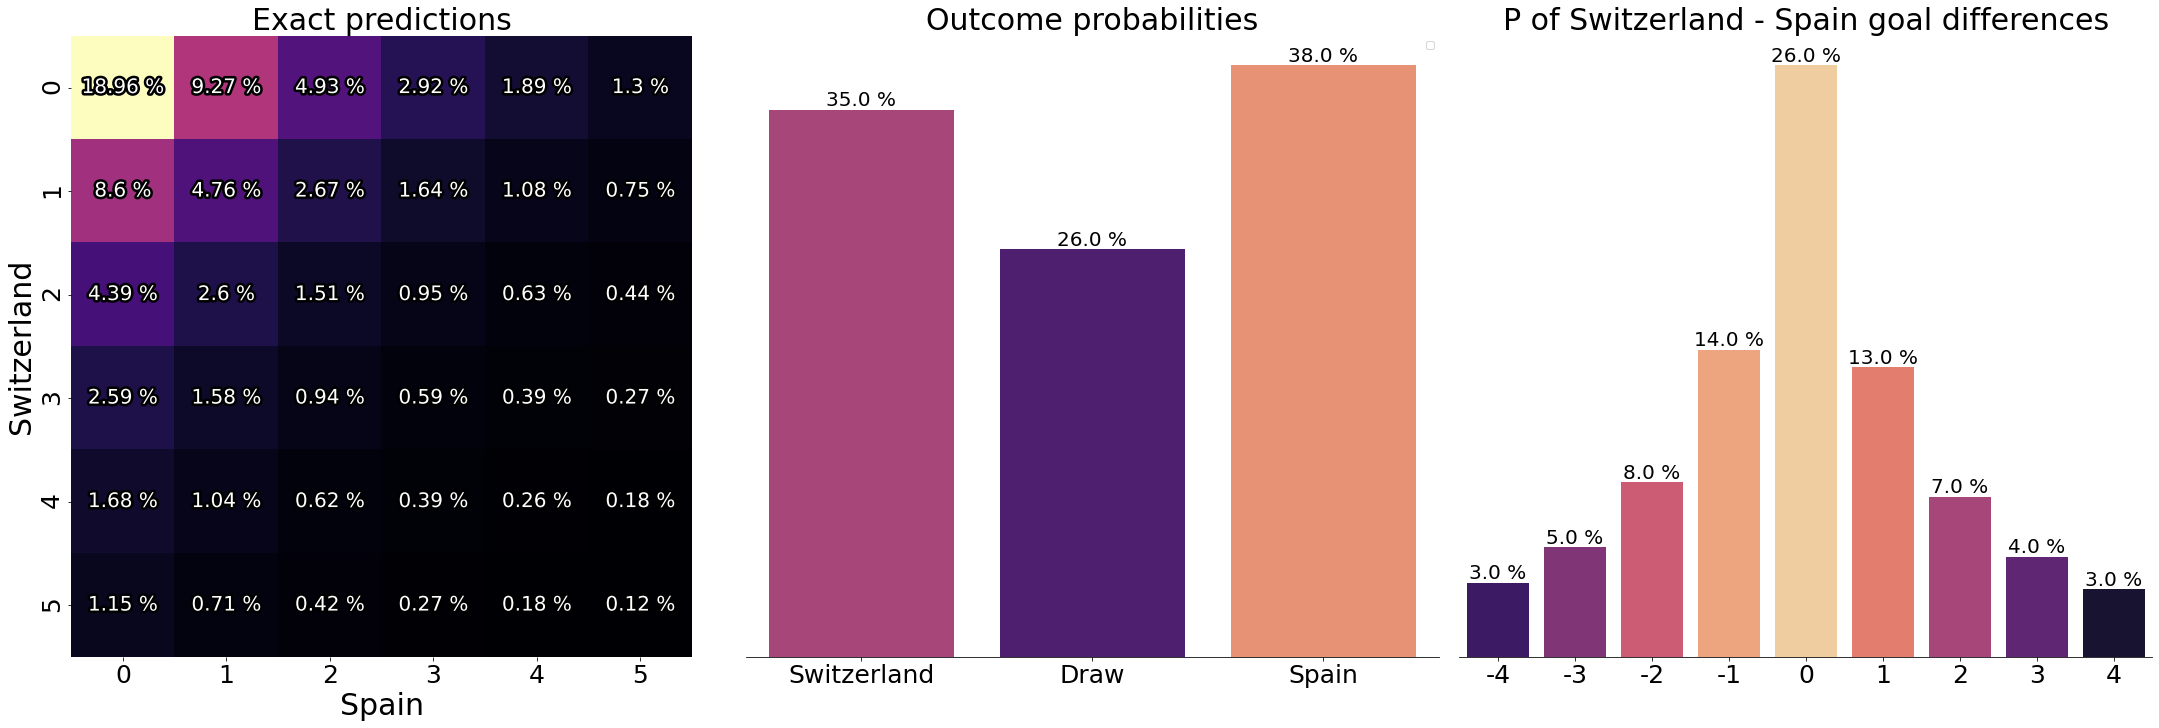

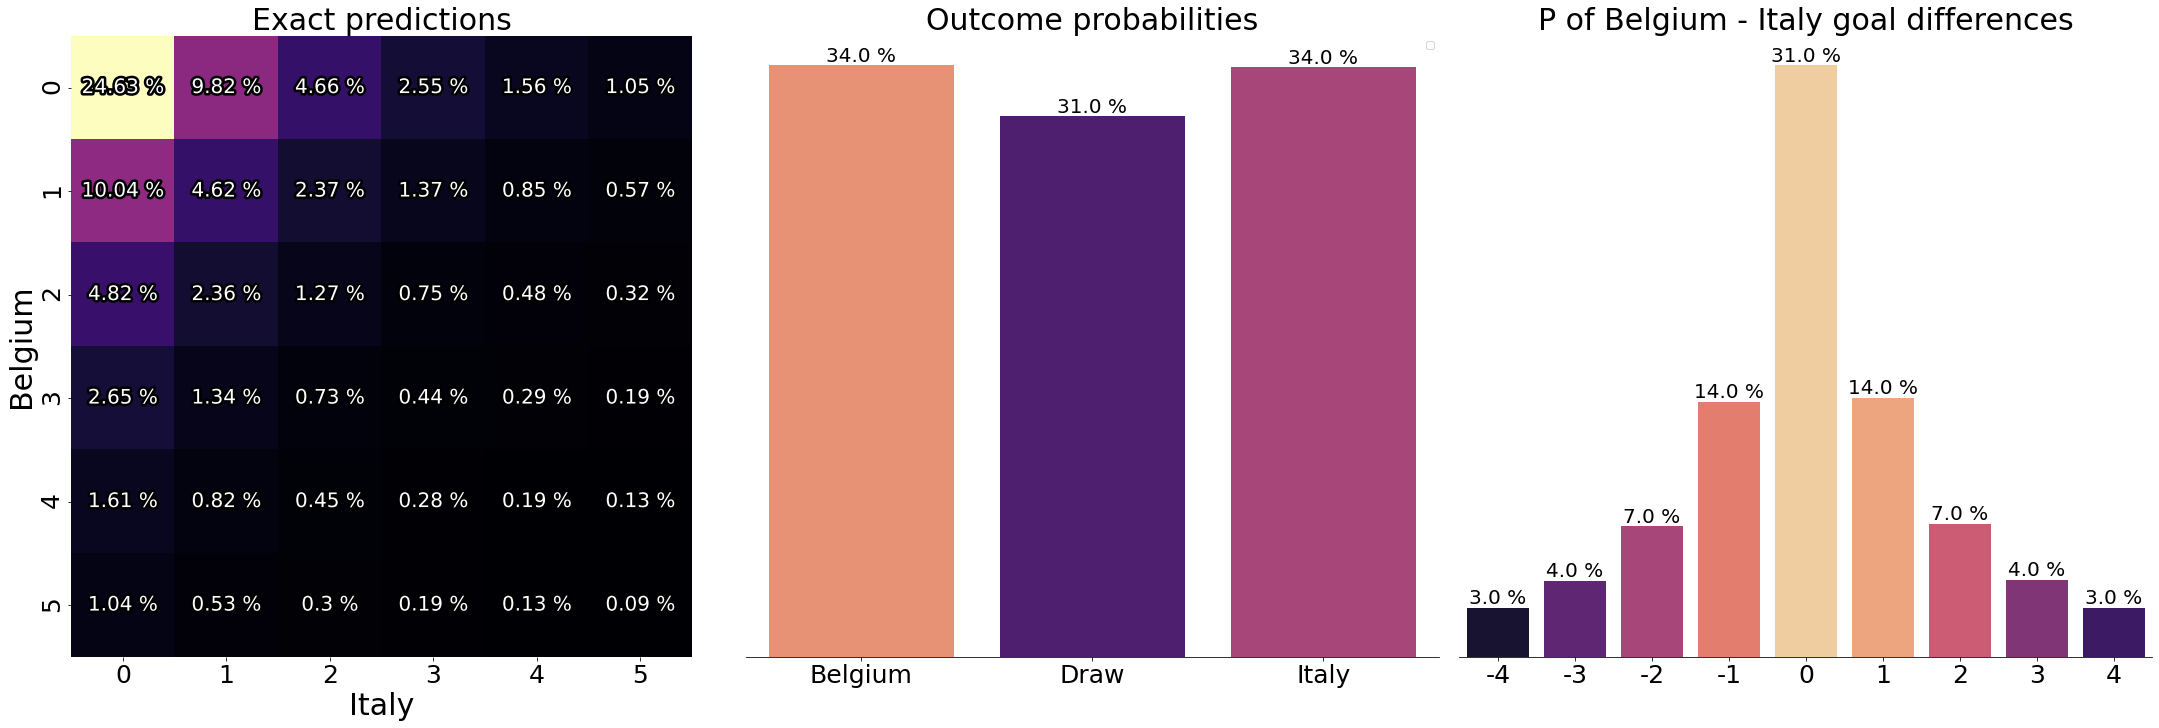

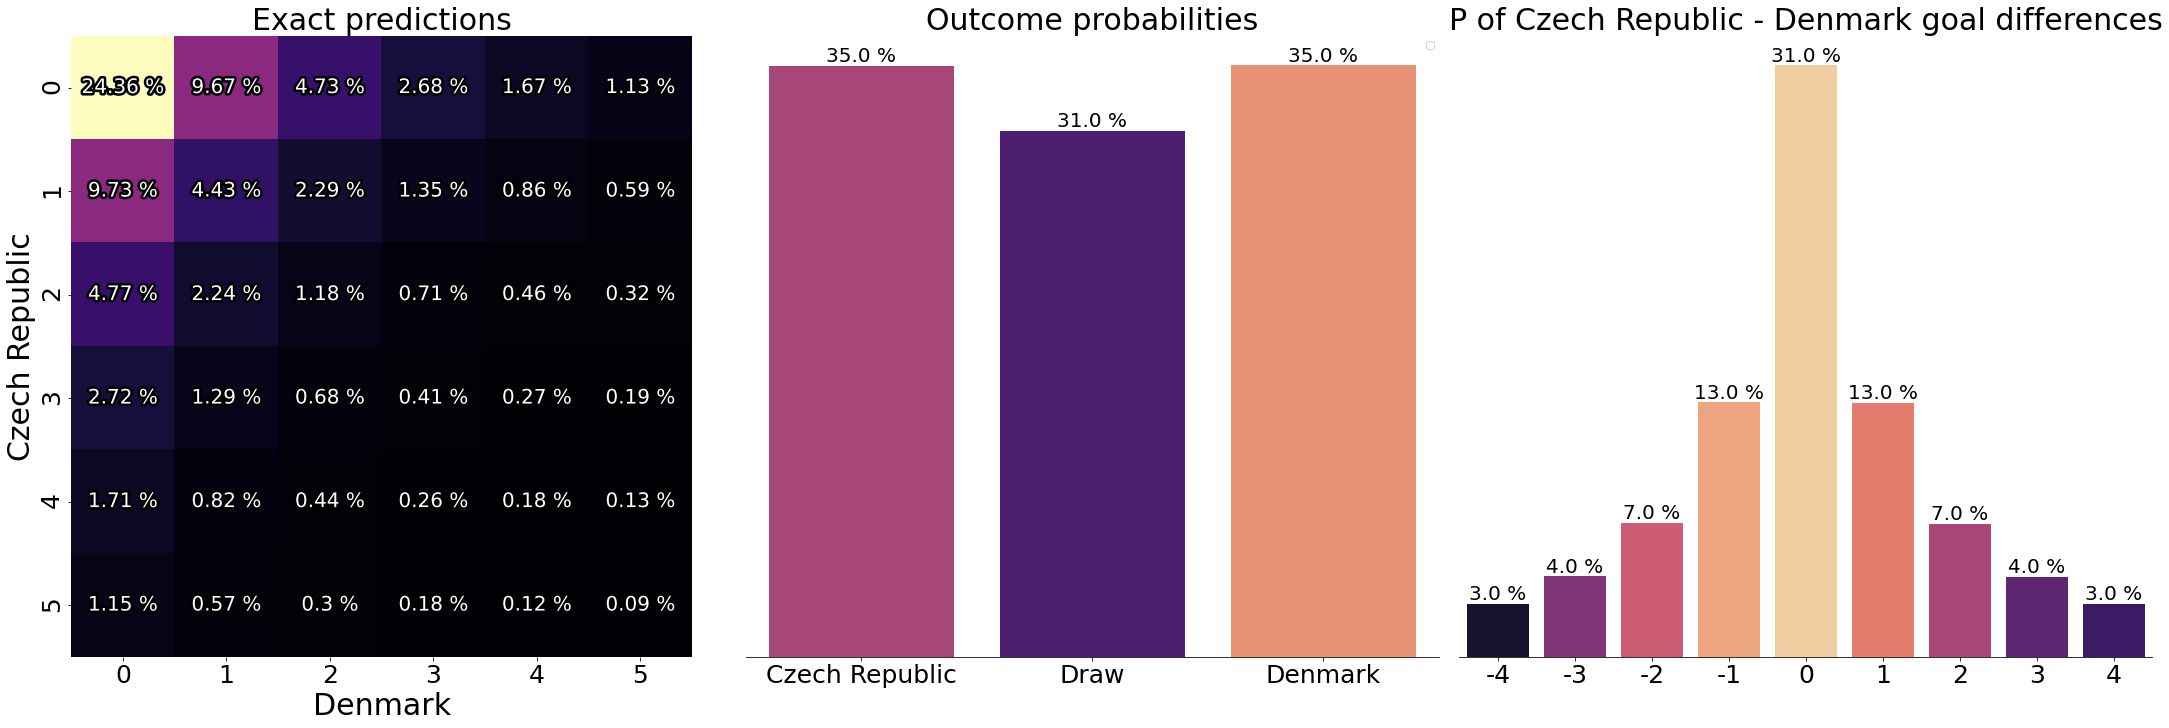

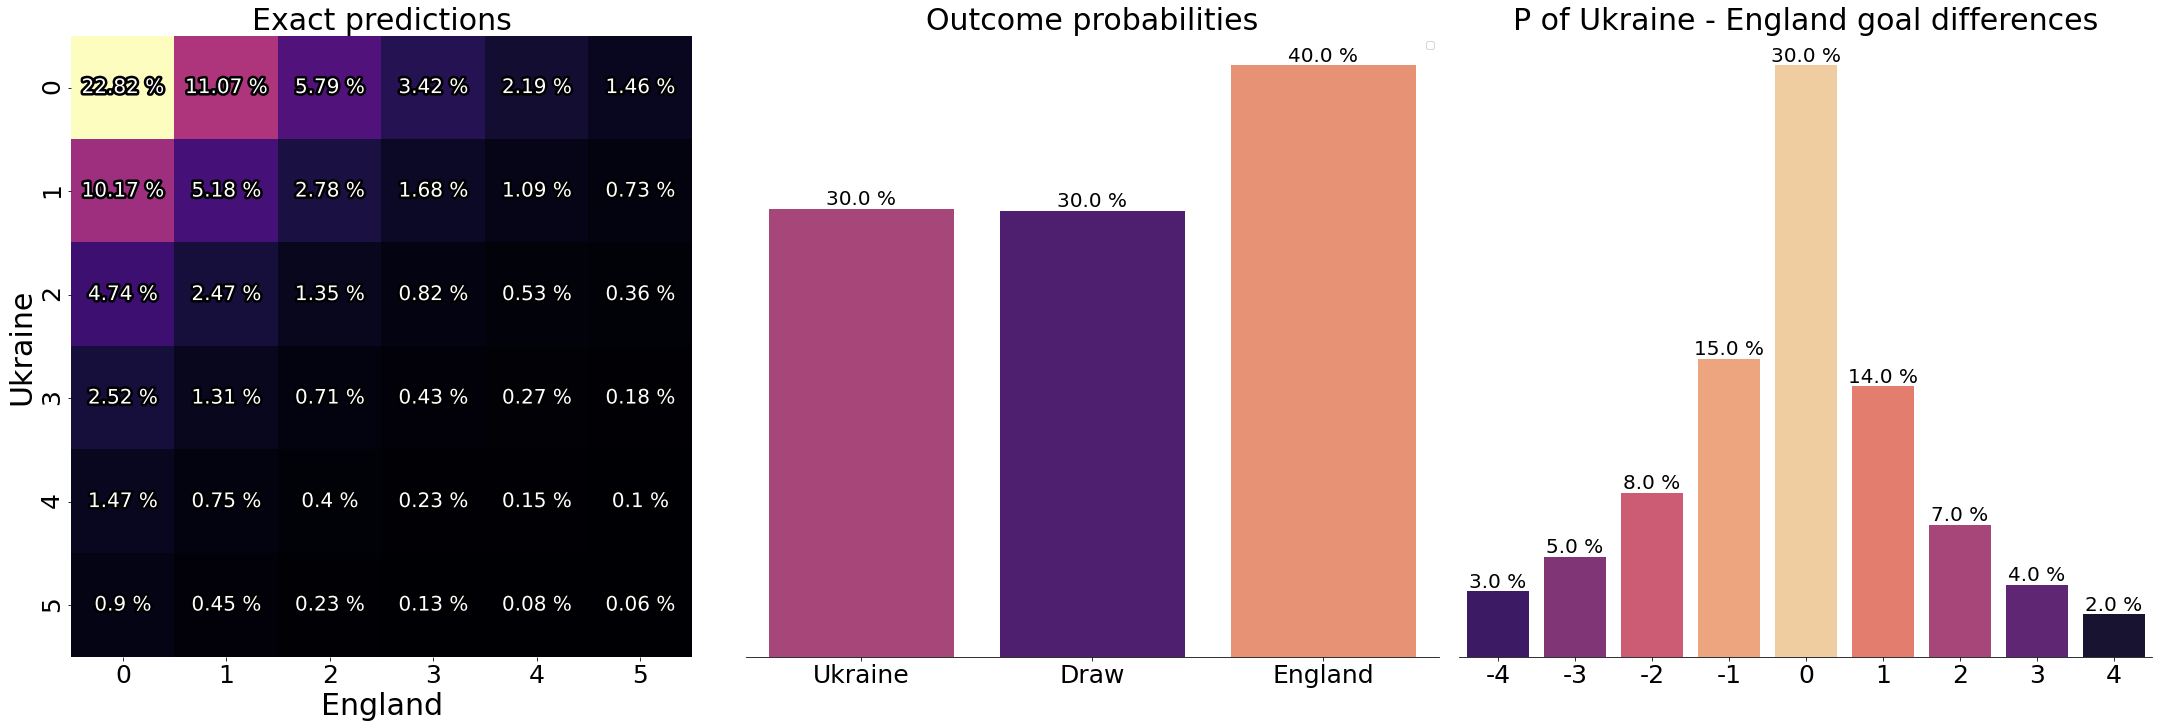

In [35]:
countries = get_country_list(data)
rho = chains['rho']
home_advantage = chains['home_advantage']
intercept = chains['intercept']
for home_team, away_team, location in matches.values:
    home_idx = country_to_idx(home_team, countries) - 1
    away_idx = country_to_idx(away_team, countries) - 1
    attack_home = chains['attack'][:, home_idx]
    attack_away = chains['attack'][:, away_idx]
    defense_home = chains['defense'][:, home_idx]
    defense_away = chains['defense'][:, away_idx]
    A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, rho, home_team, away_team, location)
    #print(A.sum())
    fig = plot_full_predictions(A, home_team, away_team, cutoff=5)

In [ ]:
home_team = 'Belgium'
away_team = 'Italy'
location = 'Germany'
countries = get_country_list(data)
A = predict_outcomes_dixon_coles(
                                )